In [27]:
!pip install wget
!pip install --upgrade vaderSentiment

import pandas as pd
import numpy as np
import importlib

import gru_data_pipeline as gdp
importlib.reload(gdp)

import gru_model as gru
importlib.reload(gru)

import etl
importlib.reload(etl)

<module 'etl' from '/content/etl.py'>

In [7]:
etl.main(is_dataset_new = False, upload = False)

/content/etl.py:131: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda x: BeautifulSoup(x, 'html.parser').get_text())


  0%|          | 0/1783641 [00:00<?, ?it/s]

/content/etl.py:131: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  lambda x: BeautifulSoup(x, 'html.parser').get_text())


  0%|          | 0/940310 [00:00<?, ?it/s]

In [8]:
x_train, x_test, y_train, y_test, embedding_matrix, num_tokens = gdp.main()

./dataset/nyc_test.csv
./dataset/nyc_train.csv
./dataset/london_train.csv
./dataset/london_test.csv


In [9]:
history, model = gru.main(x_train, y_train.values.reshape((-1,1)), embedding_matrix, num_tokens)

Epoch 1/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.7155 - loss: 0.4946 - val_accuracy: 0.9384 - val_loss: 0.1784
Epoch 2/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9400 - loss: 0.1625 - val_accuracy: 0.9441 - val_loss: 0.1473
Epoch 3/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9536 - loss: 0.1263 - val_accuracy: 0.9535 - val_loss: 0.1259
Epoch 4/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9629 - loss: 0.1035 - val_accuracy: 0.9581 - val_loss: 0.1167
Epoch 5/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9685 - loss: 0.0870 - val_accuracy: 0.9594 - val_loss: 0.1129
Epoch 6/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9746 - loss: 0.0713 - val_accuracy: 0.9575 - val_loss: 0.1193
Epoch 7/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.9813 - loss: 0.0529 - val_accuracy: 0.9550 - val_loss: 0.1359
Epoch 8/2000
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - ac

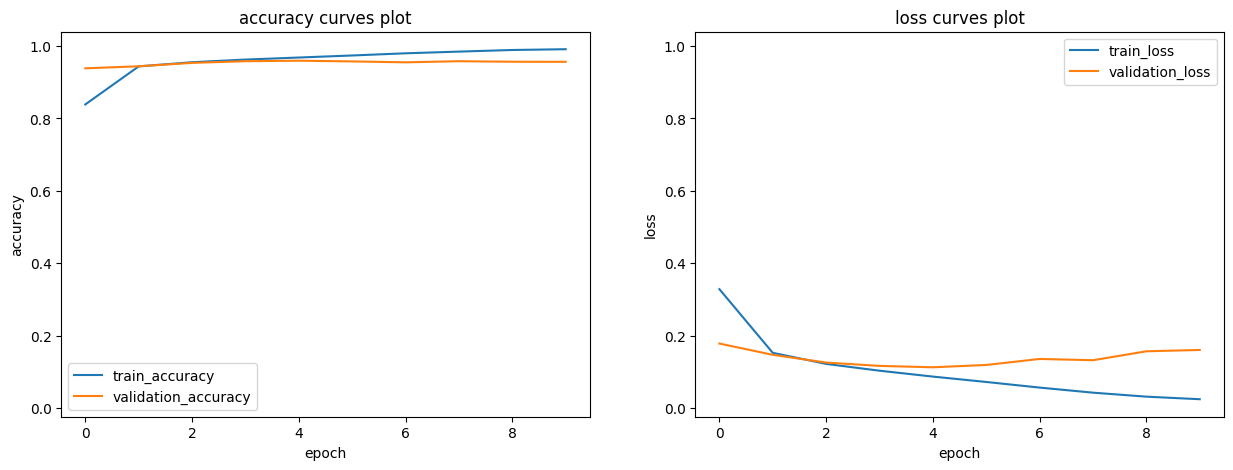

In [11]:
gru.show_learning_curves(history)

In [30]:
model.evaluate(x_test, y_test.values.reshape((-1,1)))

15551/15551 ━━━━━━━━━━━━━━━━━━━━ 47s 3ms/step - accuracy: 0.9552 - loss: 0.1749


[0.1738080233335495, 0.9552673697471619]

In [14]:
from sklearn.metrics import balanced_accuracy_score

y_pred_train = np.round(model.predict(x_train))
balanced_accuracy_score(y_train, y_pred_train)

5884/5884 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step


0.9881241966836979

In [15]:
y_pred_test = np.round(model.predict(x_test))
balanced_accuracy_score(y_test, y_pred_test)

15551/15551 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step


0.9572214211762022

In [16]:
from sklearn.metrics import classification_report

target_names = ['negative', 'positive']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.51      0.96      0.67     23535
    positive       1.00      0.96      0.98    474088

    accuracy                           0.96    497623
   macro avg       0.76      0.96      0.82    497623
weighted avg       0.98      0.96      0.96    497623



In [22]:
import numpy as np
from sklearn.metrics import f1_score

f1_score(y_test, y_pred_test, average='micro')

0.9552673409388232

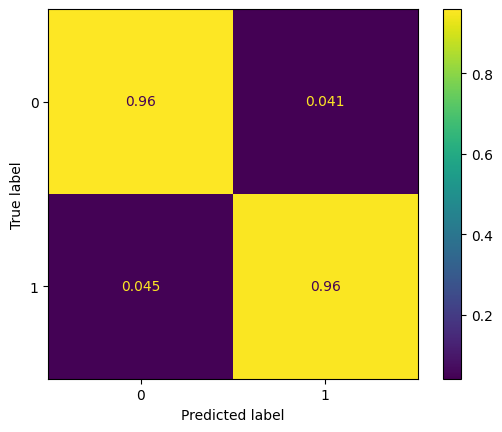

In [31]:
gru.plot_confusion(y_pred_test, y_test, normalize = "true")

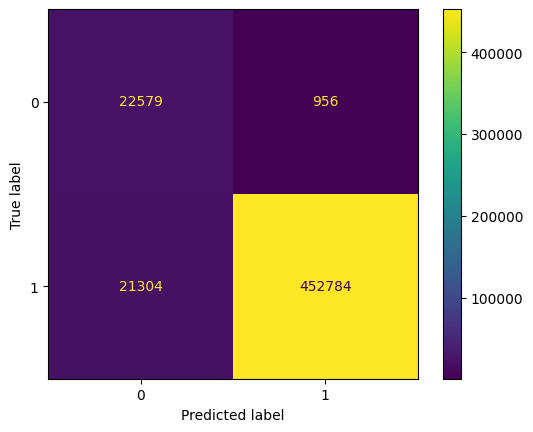

In [32]:
gru.plot_confusion(y_pred_test, y_test, normalize = None)